In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
# fig , ax1 = plt.subplots(figsize= (15,8))
#
# ax1 = sns.distplot(A['data'],bins = 28 , kde=False)
# ax1.set_xlim([Steps[0] , Steps[-1]])
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
# for p in ax1.patches:
#     #print(p)
#     ax1.text(x = p.get_x() + p.get_width()/2,
#              y = p.get_height() + len(A)*0.001,
#              s =  'X좌표 : \n{}\n {} {}'.format(round(p.get_x(),3),int(p.get_height()),'개'),
#              #s = f'{(p.get_height()/ len(A)) * 100: 1.1f}개',
#              ha = 'center')
# ax1.set_ylabel('갯수' , fontsize = 14 , labelpad= 14 ,rotation = 0)
# ax2 = ax1.twinx() #한 그래프에 두번째 plot 넣기
# ax2 = sns.distplot(A['data'],bins = 28 , hist=False , kde=True, color='red')
# ax2.set_xlim([Steps[0] , Steps[-1]]) #x축 시작 지점과 끝지점 표현
# ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
# ax2.axes.yaxis.set_visible(False) #y축 없애기
#
# x_s1 = float(A.mean() - A.std()*1)
# x_s2 = float(A.mean() - A.std()*2)
# x_s3 = float(A.mean() - A.std()*3)
# x_plus_s1 = float(A.mean() + A.std())
# x_plus_s2 = float(A.mean() + A.std()*2)
# x_plus_s3 = float(A.mean() + A.std()*3)
# # 수직선 표현하기
#
#
# ax2.axvline(x= x_s1, ymin=0 , ymax=1 , color = 'red' , linestyle ='solid' , label ='{}'.format(2))
# ax2.text(x_s1 , .19 , f'x-s : {round(x_s1,2)}',fontsize=13)
# ax2.axvline(x= x_s2, ymin=0 , ymax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(2))
# ax2.text(x_s2 , .19 , f'x-2s : {round(x_s2,2)}',fontsize=13)
# ax2.axvline(x= x_s3, ymin=0 , ymax=1 , color = 'purple' , linestyle ='solid' , label ='{}'.format(2))
# ax2.text(x_s3 , .19 , f'x-3s : {round(x_s3,2)}',fontsize=13)
#
# ax2.axvline(x= x_plus_s1, ymin=0 , ymax=1 , color = 'red' , linestyle ='solid' , label ='{}'.format(2))
# ax2.text(x_plus_s1 , .19 , f'x+1s : {round(x_plus_s1,2)}',fontsize=13)
# ax2.axvline(x= x_plus_s2, ymin=0 , ymax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(2))
# ax2.text(x_plus_s2 , .19 , f'x+2s : {round(x_plus_s2,2)}',fontsize=13)
# ax2.axvline(x= x_plus_s3, ymin=0 , ymax=1 , color = 'purple' , linestyle ='solid' , label ='{}'.format(2))
# ax2.text(x_plus_s3 , .19 , f'x+3s : {round(x_plus_s3,2)}',fontsize=13)
#
#


In [3]:
b = 100 #자료의 갯수

A = np.random.randint(1, b, size = b).tolist()
print(len(A))
A


100


[63,
 49,
 50,
 57,
 39,
 26,
 7,
 12,
 11,
 60,
 14,
 50,
 56,
 34,
 43,
 61,
 89,
 67,
 28,
 85,
 34,
 67,
 43,
 42,
 69,
 21,
 3,
 20,
 54,
 61,
 21,
 64,
 49,
 42,
 58,
 65,
 32,
 31,
 82,
 6,
 80,
 42,
 20,
 17,
 85,
 95,
 72,
 10,
 53,
 15,
 93,
 65,
 12,
 23,
 4,
 57,
 63,
 77,
 94,
 66,
 92,
 49,
 72,
 91,
 86,
 29,
 7,
 29,
 57,
 3,
 64,
 78,
 96,
 72,
 72,
 46,
 8,
 31,
 27,
 22,
 76,
 49,
 2,
 64,
 63,
 77,
 17,
 72,
 55,
 50,
 78,
 66,
 65,
 12,
 70,
 72,
 17,
 78,
 35,
 30]

In [4]:
bins = np.arange(1,max(A)+1 , 1)
hist , bins = np.histogram(A , bins)

print('hist : {}'.format(hist)) #숫자별 빈도
#print('bins : {}'.format(bins)) #막대기의 갯수

Steps=[]
for i in range(len(bins)-1):
    Steps.append((bins[i]))
print('Steps :  {}'.format(Steps))


DOSU = pd.DataFrame({'계급값' : Steps  , '도수' : hist})
DOSU

hist : [0 1 2 1 0 1 2 1 0 1 1 3 0 1 1 0 3 0 0 2 2 1 1 0 0 1 1 1 2 1 2 1 0 2 1 0 0
 0 1 0 0 3 2 0 0 1 0 0 4 3 0 0 1 1 1 1 3 1 0 1 2 0 3 3 3 2 2 0 1 1 0 6 0 0
 0 1 2 3 0 1 0 1 0 0 2 1 0 0 1 0 1 1 1 1 2]
Steps :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


,계급값,도수
0,1,0
1,2,1
2,3,2
3,4,1
4,5,0
...,...,...
90,91,1
91,92,1
92,93,1
93,94,1


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


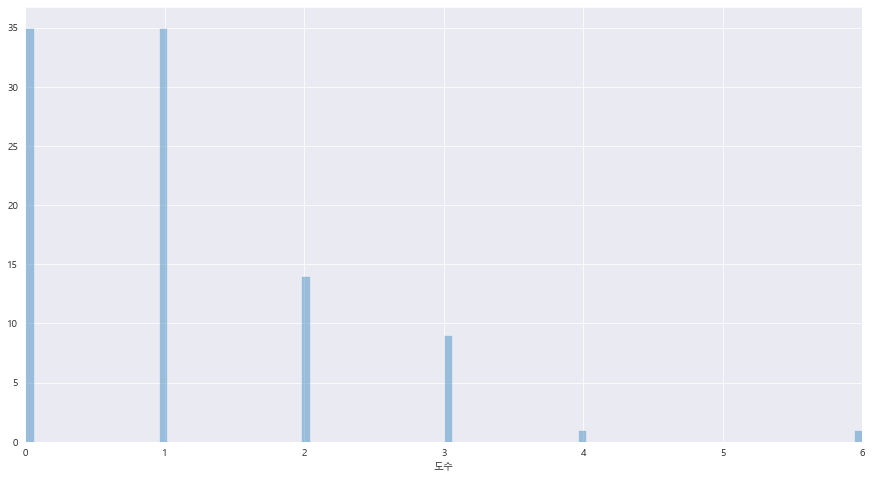

In [5]:
fig , ax1 = plt.subplots(figsize= (15,8))

ax1 = sns.distplot(DOSU.loc[: , '도수'],bins = b , kde=False)
ax1.set_xlim([0 , max(hist)])
# ax1.set_ylim([0 , max(hist)])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) #x축 간격을 1로 설정
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5)) #y축 간격을 1로 설정
# for p in ax1.patches:
#     #print(p)
#     ax1.text(x = p.get_x() + p.get_width()/2,
#              y = p.get_height() + len(A)*0.001,
#              s =  'X좌표 : \n{}\n {} {}'.format(round(p.get_x(),3),int(p.get_height()),'개'),
#              #s = f'{(p.get_height()/ len(A)) * 100: 1.1f}개',
#              ha = 'center')
# ax1.set_ylabel('갯수' , fontsize = 14 , labelpad= 14 ,rotation = 0)
# ax2 = ax1.twinx() #한 그래프에 두번째 plot 넣기
# ax2 = sns.distplot(A['도수'],bins = 28 , hist=False , kde=True, color='red')
# ax2.set_xlim([Steps[0] , Steps[-1]]) #x축 시작 지점과 끝지점 표현
# ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
# ax2.axes.yaxis.set_visible(False) #y축 없애기








In [ ]:
fig , ax1 = plt.subplots(figsize= (15,8))

ax1 = sns.distplot(DOSU.loc[: , '도수'],bins = b , kde=False)
ax1.set_xlim([0 , max(hist)])
# ax1.set_ylim([0 , max(hist)])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) #x축 간격을 1로 설정
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(5)) #y축 간격을 1로 설정

In [ ]:

# from sympy import *
# import sympy as sy
#
#
# fig ,ax = plt.figure(figsize=(15,8))
# x = sy.symbols('x')
# k  = 1/2
# fx = (1/2)  * k * x
# fx2 = (-k * (1/2)) * x + 2*k
# ax = plot(fx, xlim=(0,4) , ylim=(0,1))
#
# ax2 = plot(fx2 , xlim= (2,4) , ylim = (0,1))

In [ ]:
from numpy import linspace

min, max = 270, 300
x = linspace(min,  max, 31)
print(x)

In [ ]:
y = []

for i in x:
    y.append((i >= min and i <= max) and (1 / (max - min)) or 0)

print(y)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Uniform Distribution(min = 0, max = 1)')
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import uniform


plt.figure(figsize=(12, 8))
y = uniform(min, max).pdf(x)
print(y)
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Uniform Distribution(min = 0, max = 1)')
plt.grid()
plt.show()

In [ ]:
from numpy import random
from numpy import linspace
from scipy.stats import uniform
min, max = 270, 300
# x = linspace(min-30.5,  max+30.5, 310) #240~330 까지 301개의 동등한 배열로 만들어보기
#
# print(x)
# x = random.uniform(270 , 300 , size=310)
# x = np.arange(min-30 , max+30 , 1)
# print(x)
#y = []
# for i in x:
#     y.append((i >= min and i <= max) and (1 / (max - min)) or 0) #unform distribution y값 구하기
#
# print(y)
min = 0
max = 1
x = linspace(-0.5 , 1.5 , 10)
print(x)
print(len(x))
y_2 = uniform.pdf(loc = min, scale = max , x =x)
print(y_2)
# ======================

min = 270
max = 300
x = linspace(min-1 , max+1 , 31)
print(x)
print(len(x))
y_2 = uniform.pdf(loc = min, scale = max , x =x)
print(y_2)





In [ ]:
print(x)
fig = plt.figure(figsize=(12, 8))

ax = sns.lineplot(x = x , y= y_2) #왜 uniform이 안되는거죵

ax.set_title('균등분포(Uniform Distribution)')
ax.set_xlabel('X' , fontsize= 15)
ax.set_ylabel('Y' , fontsize= 15 , rotation = 0 , labelpad = 12)

#ax.set_xlim([230 , 340]) #x축 최소값
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) #x축 간격을 0.5로 설정

In [ ]:
min , max = 270, 300

# x_2 = linspace(min-1 , max+1 , 100)

x_2 = np.arange(min-30 , max+30 , 1)
print(x)


print(x_2)

In [ ]:
# def uniform_

In [ ]:
y = uniform.pdf( x = x_2 , loc = min , scale = max-min)
#f(x, loc, scale) = {1/scale-loc for loc <= x <= scale
# {0 otherwise}
print(y)

In [ ]:
fig = plt.figure(figsize=(12, 8))

ax = sns.lineplot(x = x_2 , y= y) #왜 uniform이 안되는거죵

ax.set_title('균등분포(Uniform Distribution)')
ax.set_xlabel('X' , fontsize= 15)
ax.set_ylabel('Y' , fontsize= 15 , rotation = 0 , labelpad = 12)



In [ ]:
print(9/32)

In [ ]:
import matplotlib.tri as mtri

fig = plt.figure(figsize=(15,8))
x = np.array([0,2,4]) #삼각형의 x좌표
y = np.array([0,0.5 , 0]) #삼각형의 y좌표

triangles = [[0,1,2]] #삼각형의 점 개수
triang = mtri.Triangulation(x,y , triangles)

plt.title("삼각 그리드")
plt.triplot(triang , 'ko-')
plt.xlim(-0.1 , 4.1)
plt.ylim(-0.1 , 0.6)
plt.show()

[0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003]


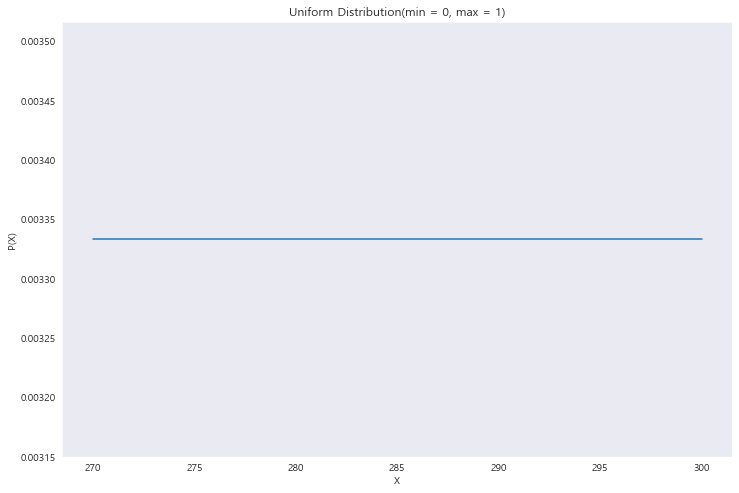

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import uniform


plt.figure(figsize=(12, 8))
y = uniform(min, max).pdf(x)
print(y)
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Uniform Distribution(min = 0, max = 1)')
plt.grid()
plt.show()

In [12]:
from numpy import random
from numpy import linspace
from scipy.stats import uniform
min, max = 270, 300
# x = linspace(min-30.5,  max+30.5, 310) #240~330 까지 301개의 동등한 배열로 만들어보기
#
# print(x)
# x = random.uniform(270 , 300 , size=310)
# x = np.arange(min-30 , max+30 , 1)
# print(x)
#y = []
# for i in x:
#     y.append((i >= min and i <= max) and (1 / (max - min)) or 0) #unform distribution y값 구하기
#
# print(y)
min = 0
max = 1
x = linspace(-0.5 , 1.5 , 10)
print(x)
print(len(x))
y_2 = uniform.pdf(loc = min, scale = max , x =x)
print(y_2)
# ======================

min = 270
max = 300
x = linspace(min-1 , max+1 , 31)
print(x)
print(len(x))
y_2 = uniform.pdf(loc = min, scale = max , x =x)
print(y_2)





[-0.5   -0.278 -0.056  0.167  0.389  0.611  0.833  1.056  1.278  1.5  ]
10
[0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
[269.    270.067 271.133 272.2   273.267 274.333 275.4   276.467 277.533
 278.6   279.667 280.733 281.8   282.867 283.933 285.    286.067 287.133
 288.2   289.267 290.333 291.4   292.467 293.533 294.6   295.667 296.733
 297.8   298.867 299.933 301.   ]
31
[0.    0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003]


[269.    270.067 271.133 272.2   273.267 274.333 275.4   276.467 277.533
 278.6   279.667 280.733 281.8   282.867 283.933 285.    286.067 287.133
 288.2   289.267 290.333 291.4   292.467 293.533 294.6   295.667 296.733
 297.8   298.867 299.933 301.   ]


Text(0, 0.5, 'Y')

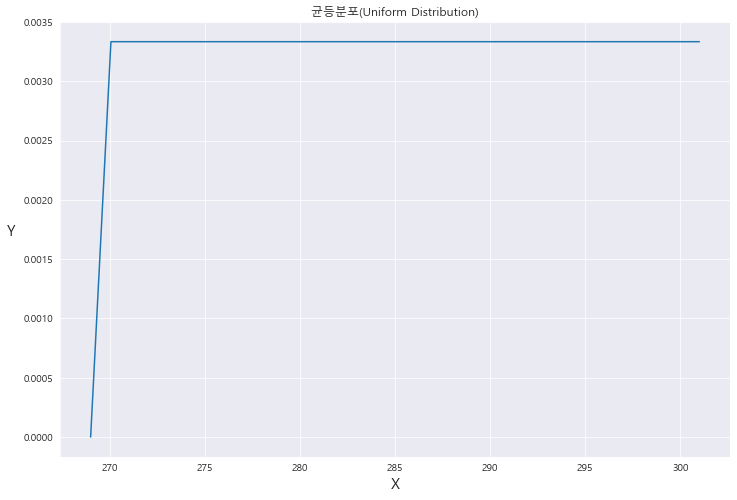

In [13]:
print(x)
fig = plt.figure(figsize=(12, 8))

ax = sns.lineplot(x = x , y= y_2) #왜 uniform이 안되는거죵

ax.set_title('균등분포(Uniform Distribution)')
ax.set_xlabel('X' , fontsize= 15)
ax.set_ylabel('Y' , fontsize= 15 , rotation = 0 , labelpad = 12)

#ax.set_xlim([230 , 340]) #x축 최소값
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) #x축 간격을 0.5로 설정

In [22]:
min , max = 270, 300

# x_2 = linspace(min-1 , max+1 , 100)

x_2 = np.arange(min-30 , max+30 , 1)
print(x)


print(x_2)

[269.    270.067 271.133 272.2   273.267 274.333 275.4   276.467 277.533
 278.6   279.667 280.733 281.8   282.867 283.933 285.    286.067 287.133
 288.2   289.267 290.333 291.4   292.467 293.533 294.6   295.667 296.733
 297.8   298.867 299.933 301.   ]
[240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329]


In [23]:
# def uniform_

In [24]:
y = uniform.pdf( x = x_2 , loc = min , scale = max-min)
#f(x, loc, scale) = {1/scale-loc for loc <= x <= scale
# {0 otherwise}
print(y)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.033 0.033 0.033 0.033 0.033 0.033
 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
 0.033 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]


Text(0, 0.5, 'Y')

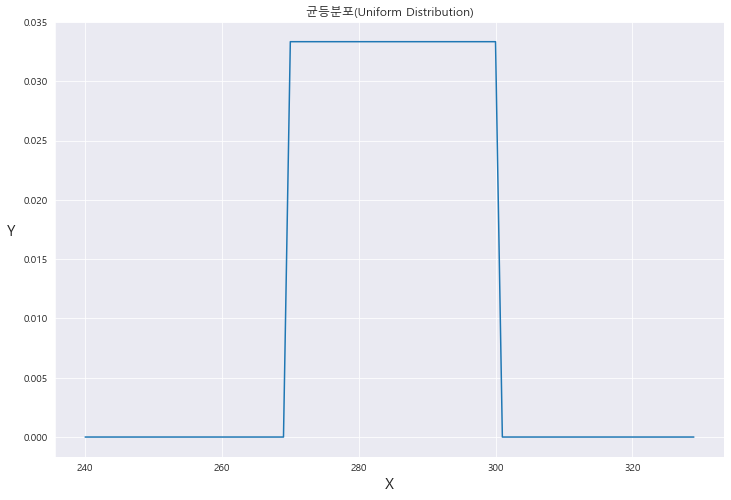

In [25]:
fig = plt.figure(figsize=(12, 8))

ax = sns.lineplot(x = x_2 , y= y) #왜 uniform이 안되는거죵

ax.set_title('균등분포(Uniform Distribution)')
ax.set_xlabel('X' , fontsize= 15)
ax.set_ylabel('Y' , fontsize= 15 , rotation = 0 , labelpad = 12)



In [ ]:
print(9/32)

In [ ]:
import matplotlib.tri as mtri

fig = plt.figure(figsize=(15,8))
x = np.array([0,2,4]) #삼각형의 x좌표
y = np.array([0,0.5 , 0]) #삼각형의 y좌표

triangles = [[0,1,2]] #삼각형의 점 개수
triang = mtri.Triangulation(x,y , triangles)

plt.title("삼각 그리드")
plt.triplot(triang , 'ko-')
plt.xlim(-0.1 , 4.1)
plt.ylim(-0.1 , 0.6)
plt.show()